<a href="https://colab.research.google.com/github/Saloni1707/TrainModel/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
data = load_breast_cancer()
df = pd.DataFrame(data.data,columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
X = data.data
y = data.target
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state=42)


In [15]:
def euclidean_distance(x1,x2):
  return np.sqrt(np.sum((x1-x2)**2))

def knn_predict(X_Train,y_train,X_test,k=3):
  predictions=[]
  for test_pnt in X_test:
    distance = []
    for i,train_pnt in enumerate(X_train):
      dist = euclidean_distance(test_pnt,train_pnt)
      distance.append((dist,y_train[i])) # Append as a tuple

    distance.sort(key=lambda x:x[0])
    k_nearest = distance[:k]

    classes = [label for _,label in k_nearest]
    prediction = max(set(classes),key=classes.count)
    predictions.append(prediction)

  return np.array(predictions)

In [16]:
def accuracy_score(y_true,y_pred):
  return np.sum(y_true == y_pred) / len(y_true)

y_pred = knn_predict(X_train,y_train,X_test,k=3)
acc = accuracy_score(y_test,y_pred)
print("Accuracy Score: ",acc)

Accuracy Score:  0.9473684210526315


In [20]:
def compute_roc_auc(y_true,y_probs,thresholds=np.linspace(0,1,100)):
  tprs = []
  fprs = []

  for t in thresholds:
    y_pred = (y_probs >= t).astype(int)

    TP = np.sum((y_pred==1) & (y_true==1))
    FP = np.sum((y_pred==1) & (y_true==0))
    FN = np.sum((y_pred==0) & (y_true==1))
    TN = np.sum((y_pred==0) & (y_true==0))

    tpr= TP/(TP+FN+ 1e-10)
    fpr= FP/(FP+TN+ 1e-10)

    tprs.append(tpr)
    fprs.append(fpr)

  auc = np.trapz(tprs,fprs)
  return np.array(fprs),np.array(tprs),auc


/tmp/ipython-input-20-3162695122.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc = np.trapz(tprs,fprs)


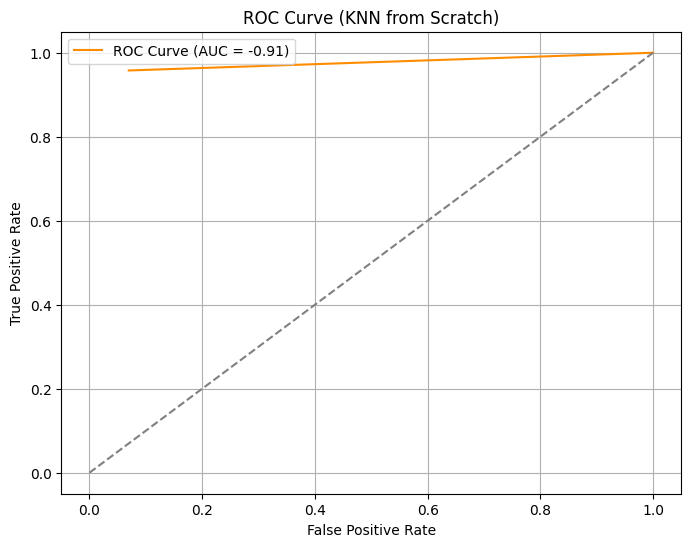

In [21]:
y_probs = knn_predict(X_train, y_train, X_test, k=5)
fpr, tpr, auc_value = compute_roc_auc(y_test, y_probs)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', label=f"ROC Curve (AUC = {auc_value:.2f})")
plt.plot([0,1], [0,1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (KNN from Scratch)")
plt.legend()
plt.grid(True)
plt.show()
